In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

# IMPORTING DATA


In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv('../AC_PFE/diabetesPima.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Exploration***

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
columns = df.columns.drop('Outcome')
# 2. Créer le tableau groupé
result = df.groupby('Outcome')[columns].agg(['mean', 'max'])
# 3. Afficher proprement
pd.set_option('display.precision', 2)  # precision de 2 décimales
result

Pregnancies     Glucose      BloodPressure      SkinThickness      \
               mean max    mean  max          mean  max          mean max   
Outcome                                                                     
0              3.30  13  109.98  197         68.18  122         19.66  60   
1              4.87  17  141.26  199         70.82  114         22.16  99   

        Insulin         BMI       DiabetesPedigreeFunction          Age      
           mean  max   mean   max                     mean   max   mean max  
Outcome                                                                      
0         68.79  744  30.30  57.3                     0.43  2.33  31.19  81  
1        100.34  846  35.14  67.1                     0.55  2.42  37.07  70

# Visualizations

Age maximal: 81 Age minimale: 21


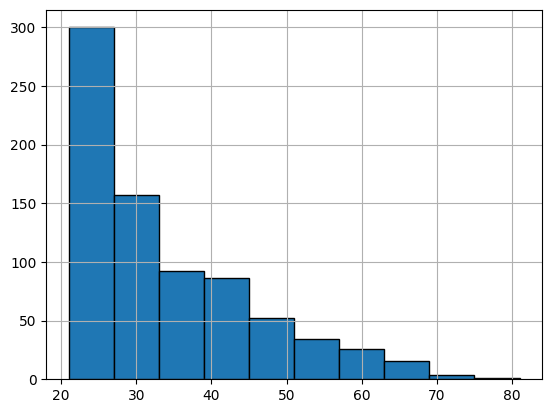

In [10]:
df["Age"].hist(edgecolor = "black");
print("Age maximal: " + str(df["Age"].max()) + " Age minimale: " + str(df["Age"].min()))

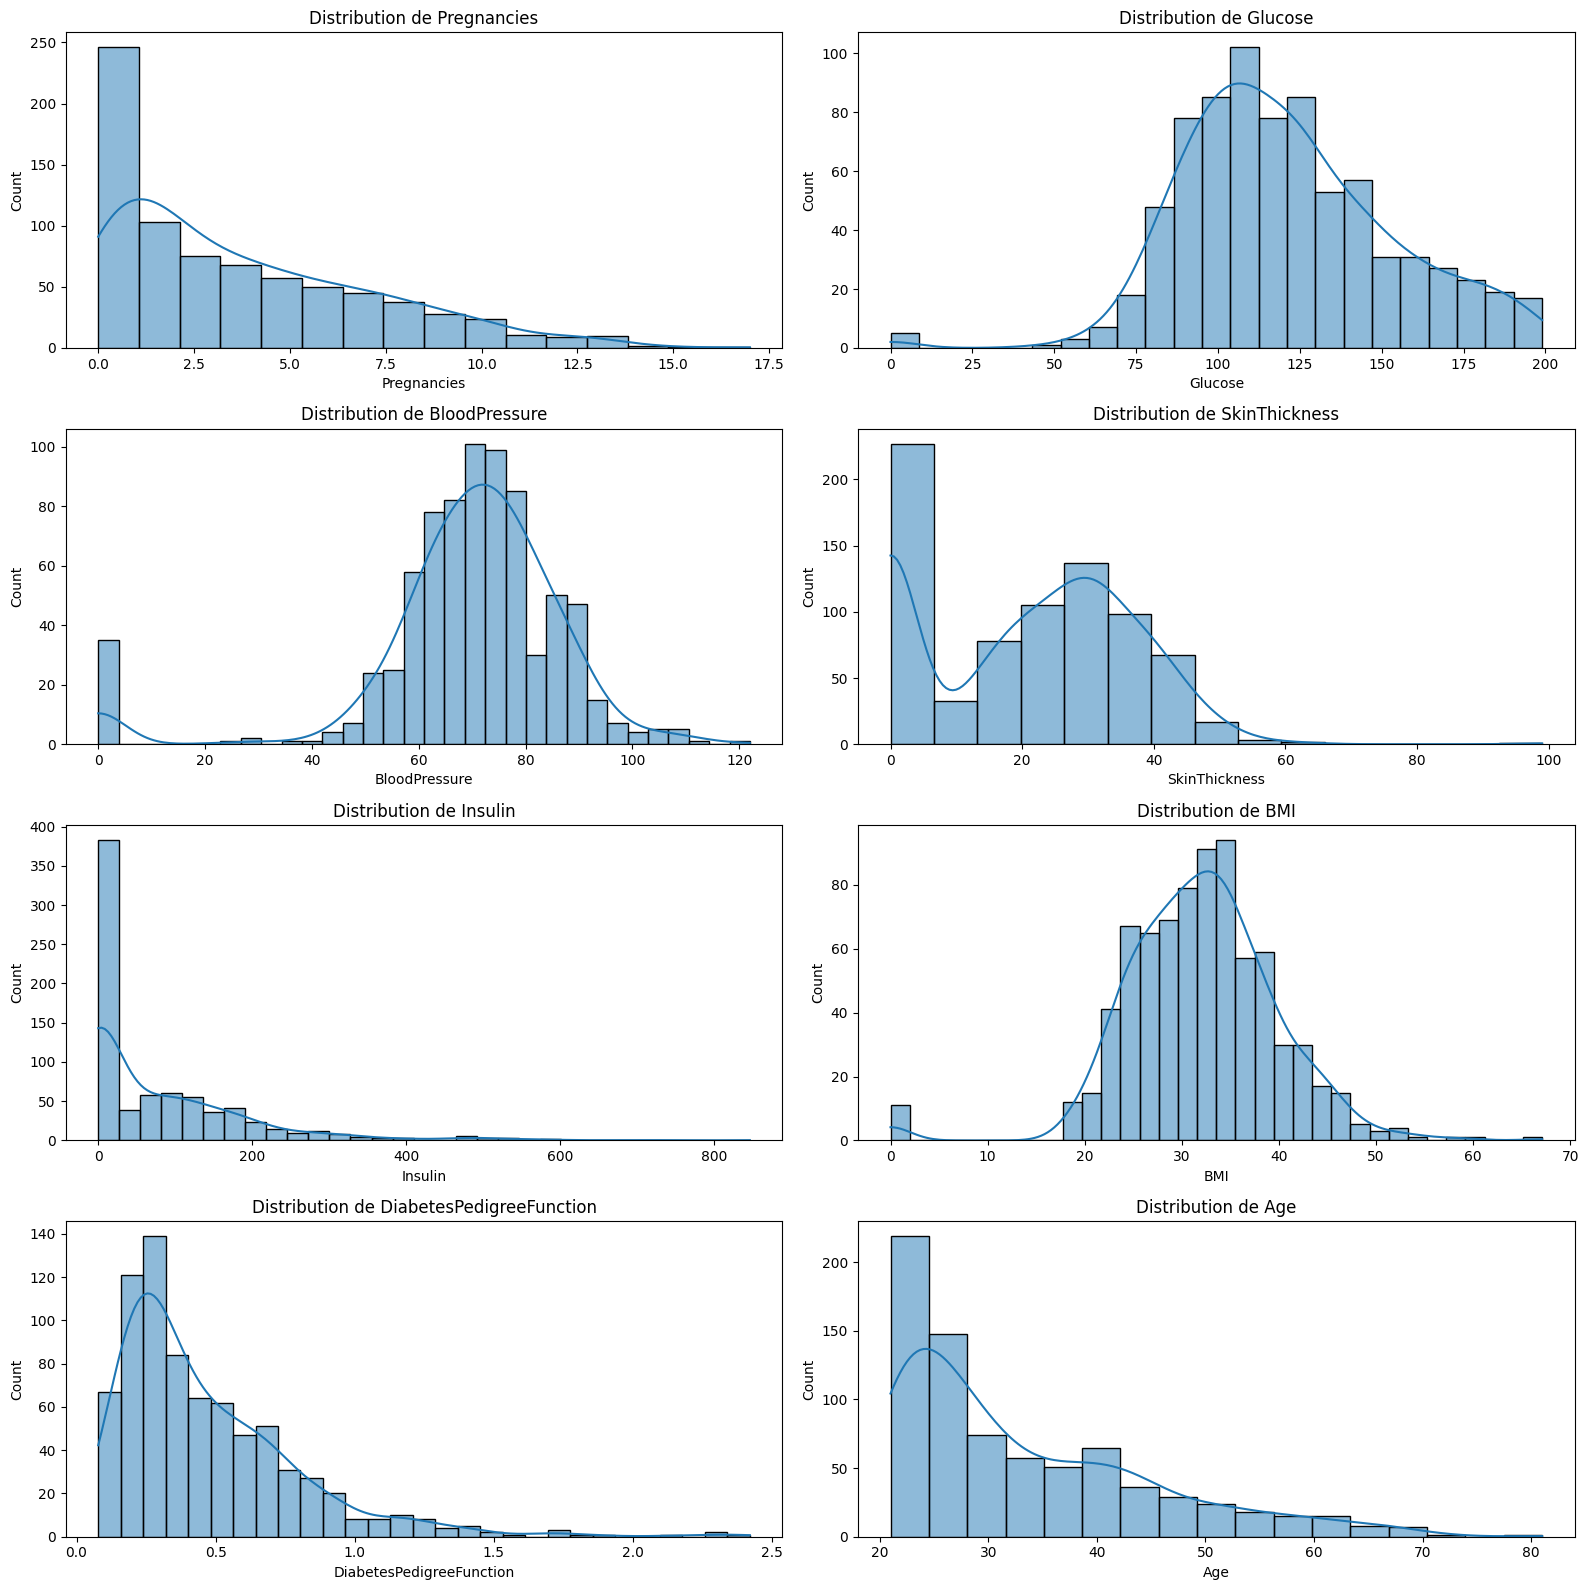

In [11]:
#les histogramms de distribution 
from math import ceil  # Import the ceil function
columns= df.iloc[:,:-1].columns #Avoir les columns sans l'étiquette
fig, axes = plt.subplots(ceil(len(columns)/2),2, figsize=(16,16))
axes = axes.flatten()  # Convertit la grille 4x2 en tableau 1D de 8 éléments

for i, col in enumerate(columns):#pair index column
    sns.histplot(data=df, x=col, kde=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

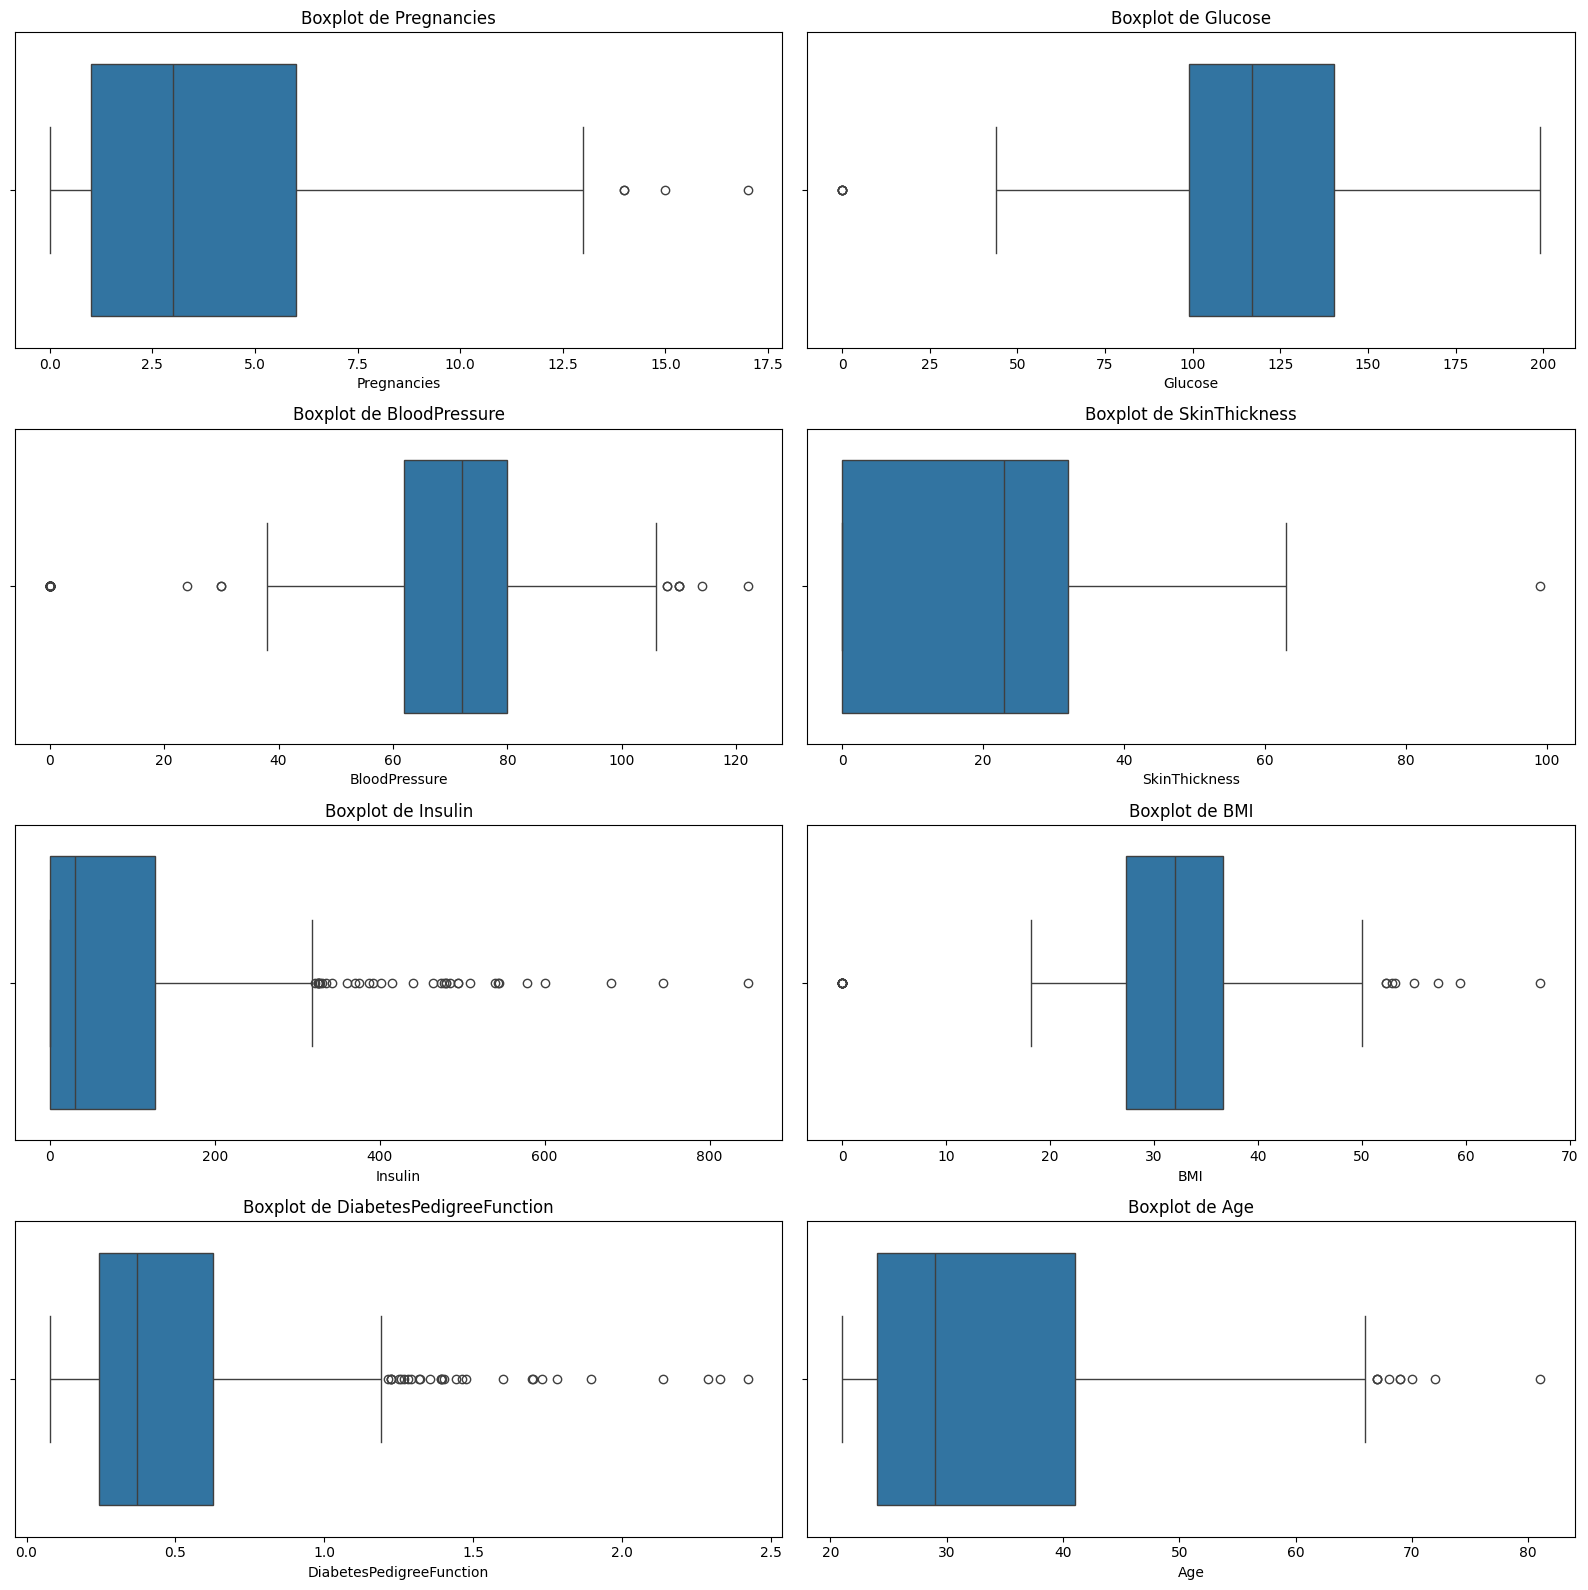

In [12]:
# Pour detecter si il y a des Outliers ou non 
fig, axes = plt.subplots(ceil(len(columns)/2),2, figsize=(16,16))
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(x = df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

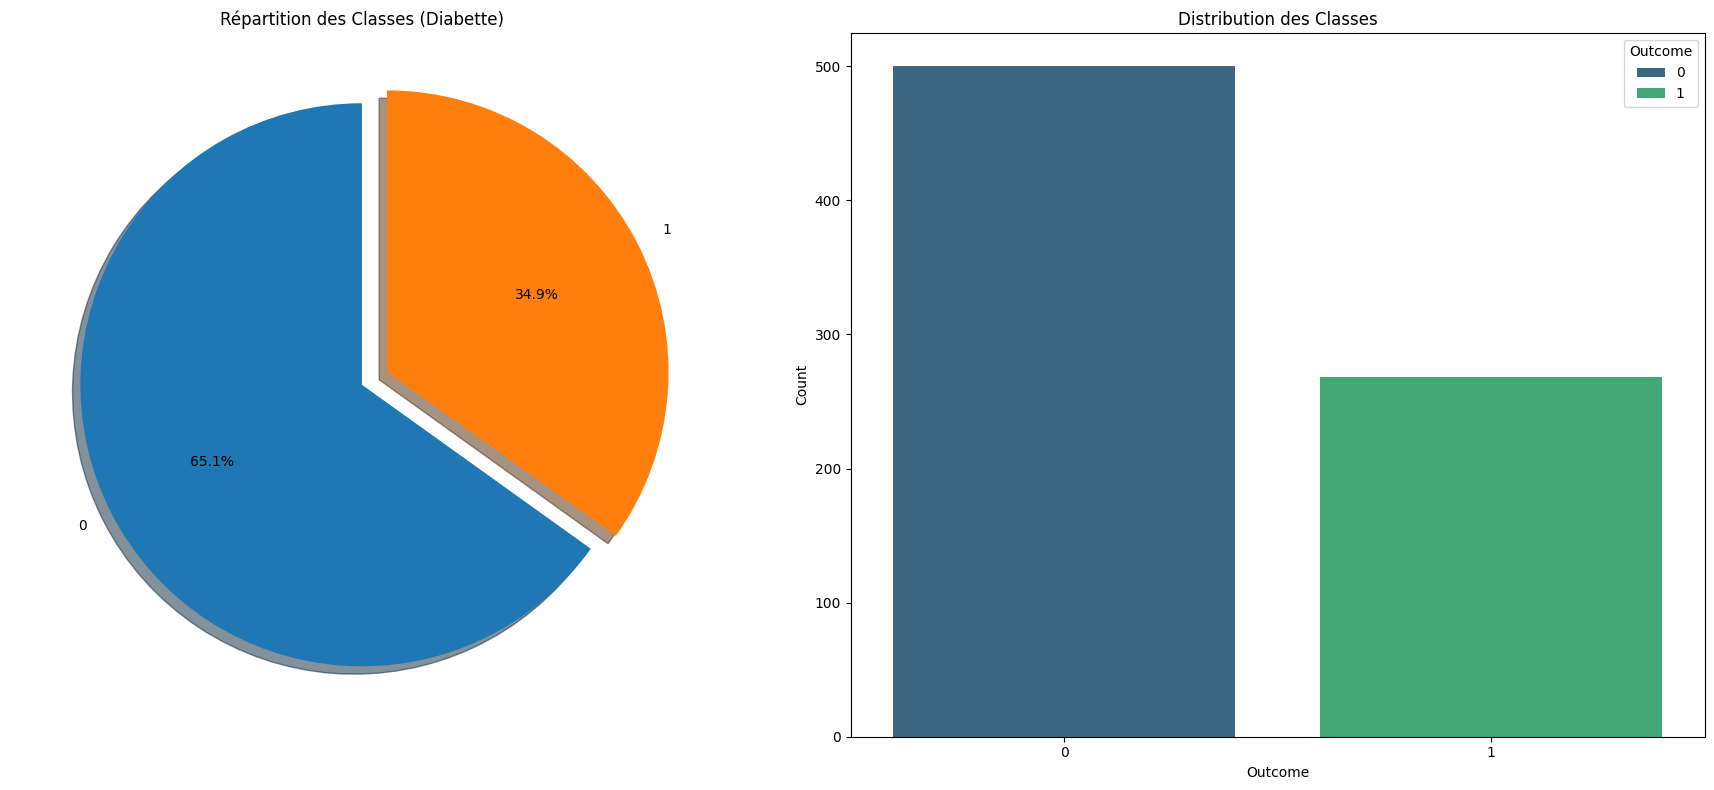

In [13]:
# La ditribution de l'etiquette 
plt.figure(figsize=(18, 8))

# Première sous-figure - Camembert
plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],#First slice (0): Not offset (stays at center),Second slice (0.1): Pulled out 10% from the center Second slice (0.1): Pulled out 10% from the center
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Répartition des Classes (Diabette)')
plt.ylabel('')  # Supprime l'étiquette y inutile

# Deuxième sous-figure - Diagramme en barres
plt.subplot(1, 2, 2)
sns.countplot(x='Outcome', data=df, palette='viridis',hue='Outcome')
plt.title('Distribution des Classes')
plt.xlabel('Outcome')  # Étiquette explicite
plt.ylabel('Count')

plt.tight_layout()  # Ajuste automatiquement les espacements
plt.show()

# DATA PREPROCESSING 

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


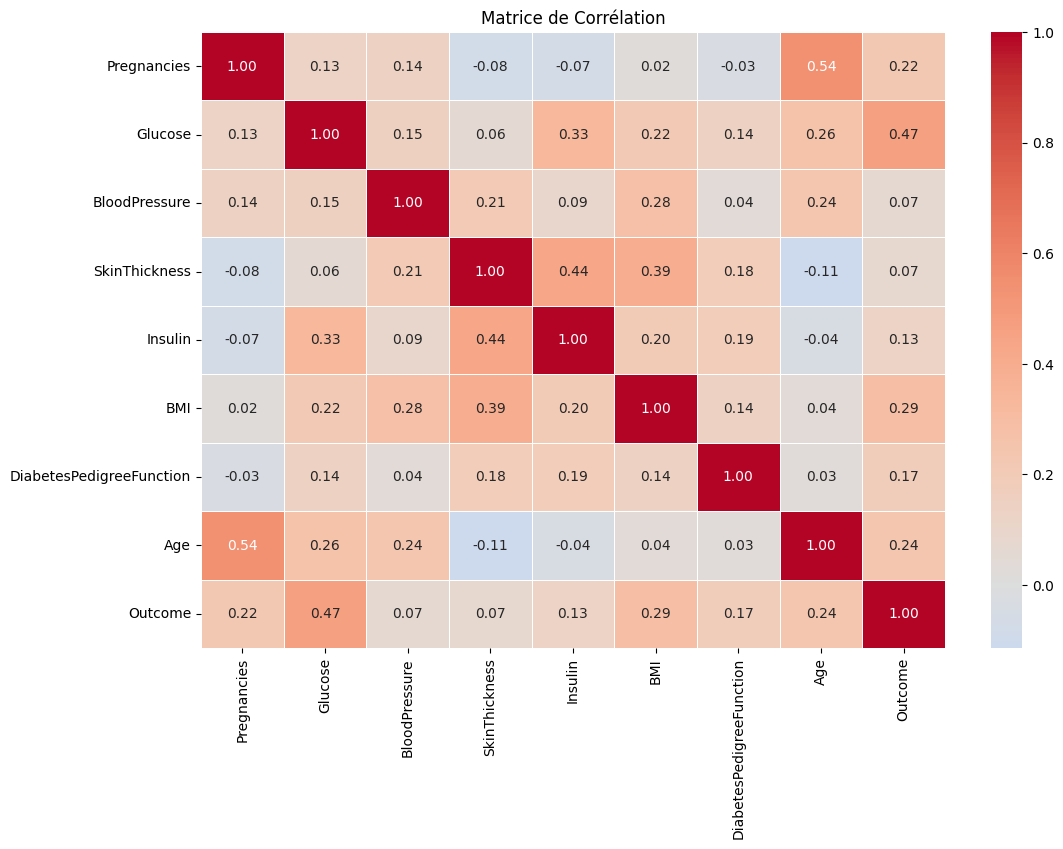

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), 
            annot=True,   # Affiche les valeurs
            fmt=".2f",   # Format à 2 décimales
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## Missing Values

In [16]:
"""
Lors de l'analyse préliminaire avec df.head(), nous avons remarqué que certaines caractéristiquescontenaient des 0, 
ce qui est biologiquement impossible. Ces 0 représentent en réalité des valeurs manquantes
Insuline : Il n'y a pas de valeur de 0 pour l'insuline dans le sang, car même en période de jeûne, le corps produit une certaine quantité d'insuline.
Une valeur normale pour l'insuline à jeun varie généralement entre 2 et 20 μU/mL, mais cela peut varier en fonction des laboratoires 
et des méthodes de mesure.
Pression artérielle : Une pression artérielle de 0 mmHg est impossible et serait synonyme d'absence totale de circulation sanguine, 
ce qui est incompatible avec la vie. Les valeurs normales pour la pression artérielle sont généralement inférieures à 120/80 mmHg.
Épaisseur de la peau : L'épaisseur de la peau varie selon les individus et les zones du corps.
Une valeur de 0 n'est pas possible, car même la peau la plus fine a une épaisseur mesurable.
IMC (Indice de Masse Corporelle) : L'IMC est calculé en divisant le poids en kilogrammes par le carré de la taille en mètres.
Une valeur de 0 est impossible, car cela impliquerait un poids ou une taille nulle. Les valeurs normales pour l'IMC sont généralement comprises
entre 18,5 et 24,9.
Glycémie : Une glycémie de 0 g/L est physiologiquement impossible, car même en cas d'hypoglycémie grave, 
le taux de glucose dans le sang ne descend pas à zéro. Les valeurs normales pour la glycémie à jeun se situent entre 0,70 et 1,10 g/L
"""

"\nLors de l'analyse préliminaire avec df.head(), nous avons remarqué que certaines caractéristiquescontenaient des 0, \nce qui est biologiquement impossible. Ces 0 représentent en réalité des valeurs manquantes\nInsuline : Il n'y a pas de valeur de 0 pour l'insuline dans le sang, car même en période de jeûne, le corps produit une certaine quantité d'insuline.\nUne valeur normale pour l'insuline à jeun varie généralement entre 2 et 20 μU/mL, mais cela peut varier en fonction des laboratoires \net des méthodes de mesure.\nPression artérielle : Une pression artérielle de 0 mmHg est impossible et serait synonyme d'absence totale de circulation sanguine, \nce qui est incompatible avec la vie. Les valeurs normales pour la pression artérielle sont généralement inférieures à 120/80 mmHg.\nÉpaisseur de la peau : L'épaisseur de la peau varie selon les individus et les zones du corps.\nUne valeur de 0 n'est pas possible, car même la peau la plus fine a une épaisseur mesurable.\nIMC (Indice de Ma

In [17]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.63,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.35,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1


In [19]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
def median_column(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [21]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_column(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_column(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_column(i)[i][1]

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.63,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.35,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1


## Normalization

In [23]:
from sklearn import preprocessing
from sklearn import compose
from sklearn import impute
X=df.drop('Outcome',axis=1)
Y=df['Outcome']
scaler=preprocessing.RobustScaler()
scaled=scaler.fit_transform(X)

In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
scaled

array([[ 0.6       ,  0.7654321 ,  0.        , ...,  0.17032967,
         0.66535948,  1.23529412],
       [-0.4       , -0.79012346, -0.375     , ..., -0.5989011 ,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.62962963, -0.5       , ..., -0.96153846,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.09876543,  0.        , ..., -0.64285714,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.22222222, -0.75      , ..., -0.21428571,
        -0.06143791,  1.05882353],
       [-0.4       , -0.59259259, -0.125     , ..., -0.18131868,
        -0.1503268 , -0.35294118]])

# Models 

## Machine learning Models

In [2]:
#Importation des biblio
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

In [27]:
#Separation des donnes en 80% pour l entrainement et 20% pour test
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, test_size=0.2,
                                                    random_state=42)

In [28]:
Accurancies2={}
Accurancies_croos1={}
Accurancies1={}
Accurancies_croos2={}

### K-NearestNeighbors sans optimisation

In [29]:
#Créer le modèle KNN
modelKNN1 = KNeighborsClassifier()

In [30]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelKNN1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelKNN1.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Prédire sur l'ensemble de test
y_pred_test = modelKNN1.predict(X_test)
y_pred_train = modelKNN1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelKNN1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelKNN1.predict_proba(X_train)[:,1]

In [32]:
'''
 ** Objectif : Évaluer la capacité du modèle à distinguer les classes.
 ** L'axe des X représente le Taux de Faux Positifs (FPR) : plus on va à droite, 
    plus le modèle fait d'erreurs en prédisant 1 au lieu de 0
 ** L'axe des Y représente le Taux de Vrais Positifs (TPR) : plus on monte, 
    plus le modèle identifie correctement la classe 1.
 ** Plus la courbe est éloignée de la diagonale rouge, meilleur est le modèle.
 ** L’AUC (Area Under Curve) doit être proche de 1
'''

"\n ** Objectif : Évaluer la capacité du modèle à distinguer les classes.\n ** L'axe des X représente le Taux de Faux Positifs (FPR) : plus on va à droite, \n    plus le modèle fait d'erreurs en prédisant 1 au lieu de 0\n ** L'axe des Y représente le Taux de Vrais Positifs (TPR) : plus on monte, \n    plus le modèle identifie correctement la classe 1.\n ** Plus la courbe est éloignée de la diagonale rouge, meilleur est le modèle.\n ** L’AUC (Area Under Curve) doit être proche de 1\n"

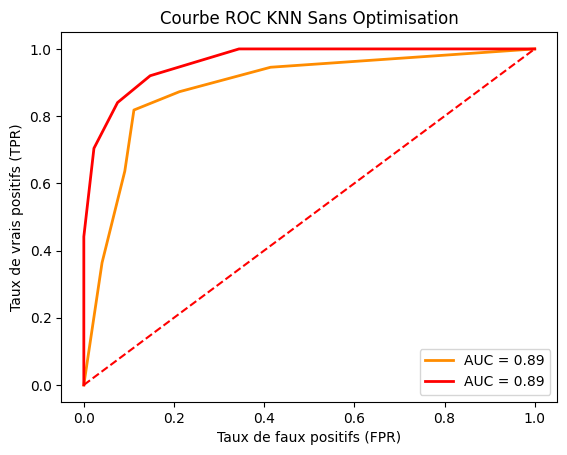

In [33]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC KNN Sans Optimisation')
plt.show()

In [34]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [35]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'KNN':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'KNN':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.86363636 0.85714286 0.83766234 0.8496732  0.87581699]
Précision moyenne de la validation croisée : 85.68%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [36]:
print(conf_matrix)

[[88 11]
 [10 45]]


<Axes: >

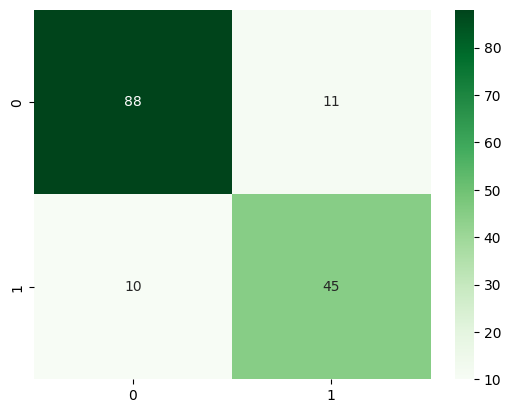

In [37]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### K-NearestNeighbors avec optimisation

Creation de modele

In [38]:
# Définir les hyperparamètres à tester pour KNN
param_gridKNN = {
'n_neighbors': [3, 5, 7, 9, 11],# nombre des voisins
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski'] # Methode de calculer la distance
}
#Créer le modèle KNN
modelKNN = KNeighborsClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchKNN = GridSearchCV(estimator=modelKNN, param_grid=param_gridKNN
,cv=5,scoring='accuracy',verbose=2)

In [39]:
grid_searchKNN.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchKNN.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelKNN = grid_searchKNN.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

In [40]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelKNN, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [41]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelKNN.predict(X_test)
y_pred_train = best_modelKNN.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelKNN.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelKNN.predict_proba(X_train)[:,1]

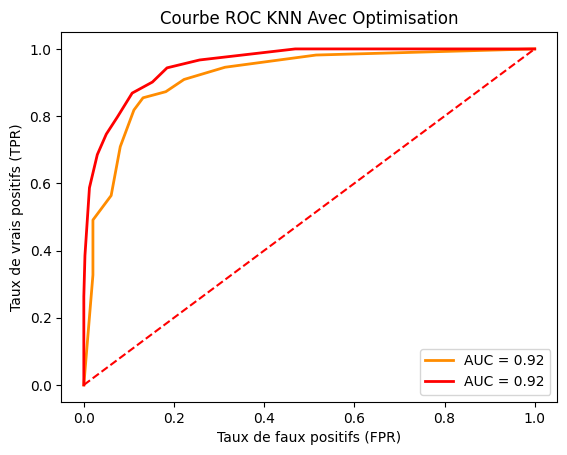

In [42]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC KNN Avec Optimisation')
plt.show()

In [43]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [44]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'KNN':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'KNN':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.87012987 0.88311688 0.87662338 0.86928105 0.85620915]
Précision moyenne de la validation croisée : 87.11%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [45]:
print(conf_matrix)

[[88 11]
 [10 45]]


<Axes: >

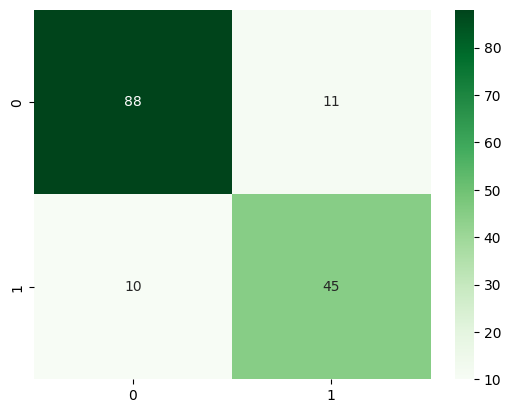

In [46]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Régression logistique

Creation de modele

In [47]:
modelLR = LogisticRegression(max_iter=200)
# Entraîner le modèle sur l'ensemble d'entraînement
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(modelLR, scaled, Y, cv=cv, scoring='accuracy')
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Evaluation de modele

In [48]:
# Prédire sur l'ensemble de test
y_pred_test = modelLR.predict(X_test)
y_pred_train = modelLR.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelLR.predict_proba(X_test)[:,1]
y_pred_proba_train = modelLR.predict_proba(X_train)[:,1]

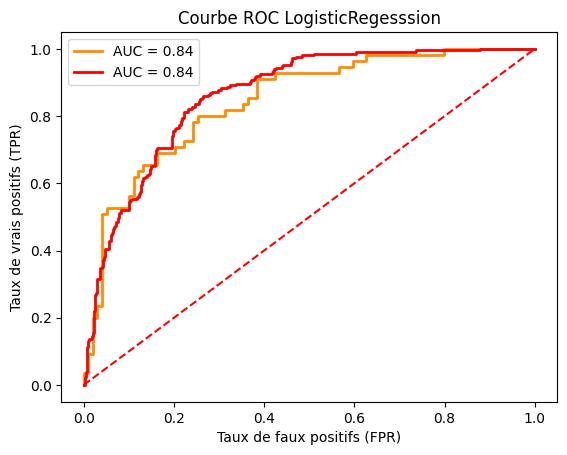

In [49]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC LogisticRegesssion')
plt.show()

In [50]:
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [51]:
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'LogisticRegression':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'LogisticRegression':round(accuracy,2)}
Accurancies1.update(T)
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.76623377 0.74675325 0.80519481 0.80392157 0.77777778]
Précision moyenne de la validation croisée : 78.00%
Précision globale sur l'ensemble de test : 77.27%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [52]:
print(conf_matrix)

[[83 16]
 [19 36]]


<Axes: >

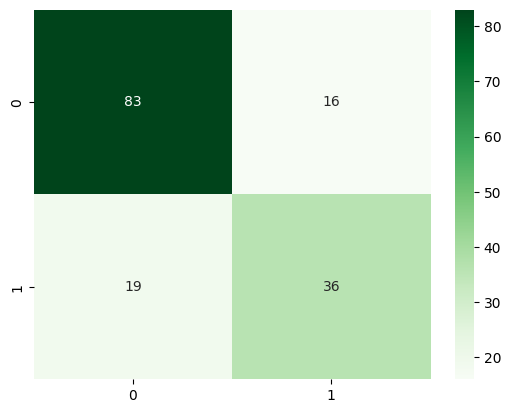

In [53]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Decision tree sans Optimisation

In [54]:
#Créer le modèle DecisionTree
modelDR1 = DecisionTreeClassifier(random_state=42)

In [55]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelDR1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelDR1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
# Prédire sur l'ensemble de test
y_pred_test = modelDR1.predict(X_test)
y_pred_train = modelDR1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelDR1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelDR1.predict_proba(X_train)[:,1]

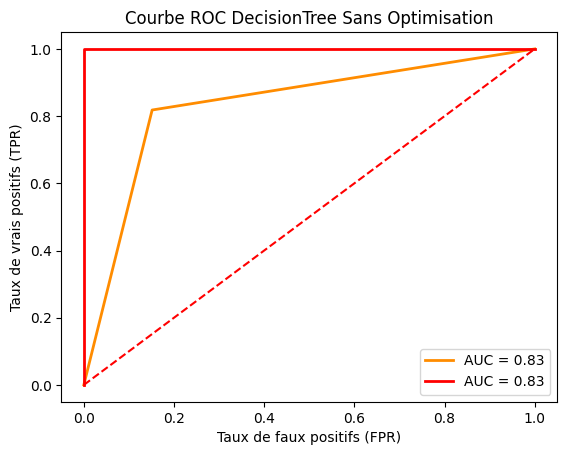

In [57]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC DecisionTree Sans Optimisation')
plt.show()

In [58]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [59]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'DecisionTree':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'DecisionTree':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.86363636 0.85064935 0.85714286 0.87581699 0.88888889]
Précision moyenne de la validation croisée : 86.72%
Précision globale sur l'ensemble de test : 83.77%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        99
           1       0.75      0.82      0.78        55

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



In [60]:
print(conf_matrix)

[[84 15]
 [10 45]]


<Axes: >

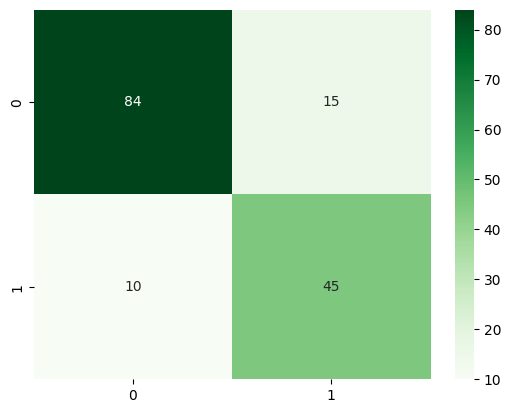

In [61]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Decision tree avec Optimisation

Creation de modele

In [62]:
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
#Initialisation de GridSearchCV avec DecisionTreeClassifier
grid_searchDT = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid, cv=5, scoring='accuracy',verbose=2)

In [63]:
grid_searchDT.fit(scaled, Y)
# Meilleurs paramètres
print("Meilleurs paramètres : ", grid_searchDT.best_params_)
# Entraînement final avec les meilleurs paramètres
best_modelDT = grid_searchDT.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

In [64]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelDT, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelDT.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [65]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelDT.predict(X_test)
y_pred_train = best_modelDT.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelDT.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelDT.predict_proba(X_train)[:,1]

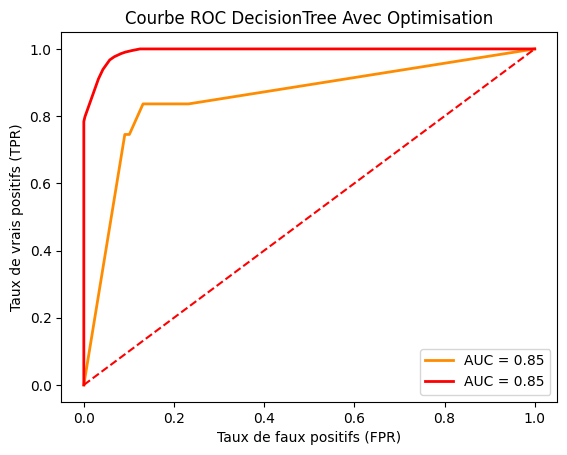

In [66]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC DecisionTree Avec Optimisation')
plt.show()

Evaluation de modele

In [67]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [68]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
CVS={'DecisionTree':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
T={'DecisionTree':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88961039 0.86363636 0.88311688 0.87581699 0.88888889]
Précision moyenne de la validation croisée : 88.02%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [69]:
print(conf_matrix)

[[86 13]
 [ 9 46]]


<Axes: >

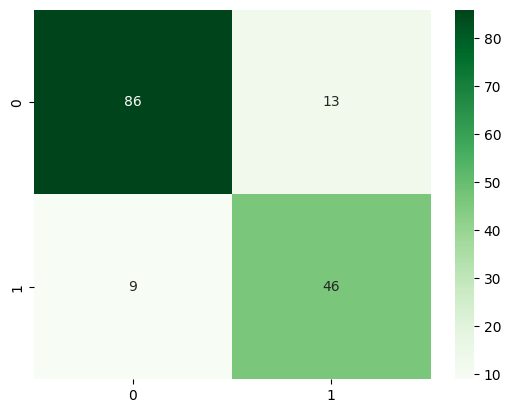

In [70]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Support Vector Machines sans Optimisation

In [71]:
#Créer le modèle SVM
modelSVC1 = SVC(probability=True)

In [72]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelSVC1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelSVC1.fit(X_train, y_train)

SVC(probability=True)

In [73]:
# Prédire sur l'ensemble de test
y_pred_test = modelSVC1.predict(X_test)
y_pred_train = modelSVC1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelSVC1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelSVC1.predict_proba(X_train)[:,1]

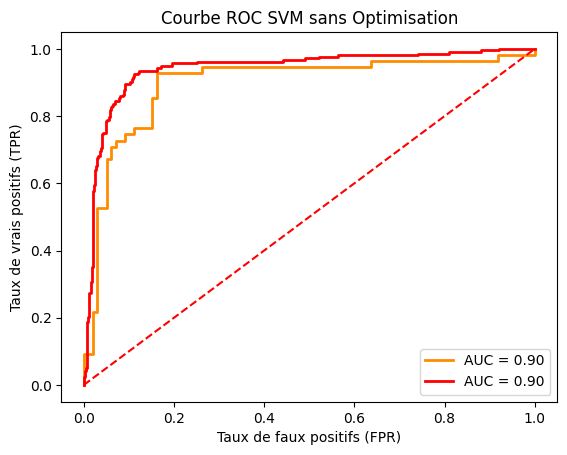

In [74]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC SVM sans Optimisation')
plt.show()

In [75]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [76]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'SVM':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'SVM':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.85064935 0.83766234 0.83116883 0.88235294 0.84313725]
Précision moyenne de la validation croisée : 84.90%
Précision globale sur l'ensemble de test : 83.12%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        99
           1       0.76      0.76      0.76        55

    accuracy                           0.83       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



In [77]:
print(conf_matrix)

[[86 13]
 [13 42]]


<Axes: >

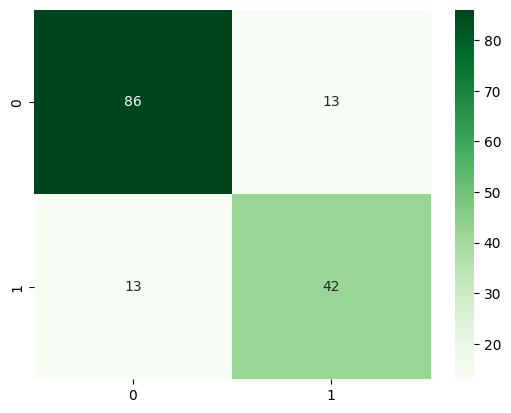

In [78]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Support Vector Machines avec Optimisation

In [79]:
# Définir les hyperparamètres à tester pour SVC
param_grid = {
'C': [0.1, 1, 10],
'gamma': [1, 0.1, 0.01, 0.001],
'kernel': ['rbf', 'linear']
}
# Créer le modèle SVC
modelSVC = SVC(probability=True)
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchSVC = GridSearchCV(estimator=modelSVC, param_grid=param_grid, cv=5,
                           scoring='accuracy',verbose=2)

In [80]:
grid_searchSVC.fit(scaled, Y)
# Meilleurs paramètres
print("Meilleurs paramètres : ", grid_searchSVC.best_params_)
# Entraînement final avec les meilleurs paramètres
best_modelSVC = grid_searchSVC.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [81]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelSVC, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelSVC.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [82]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelSVC.predict(X_test)
y_pred_train = best_modelSVC.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelSVC.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelSVC.predict_proba(X_train)[:,1]

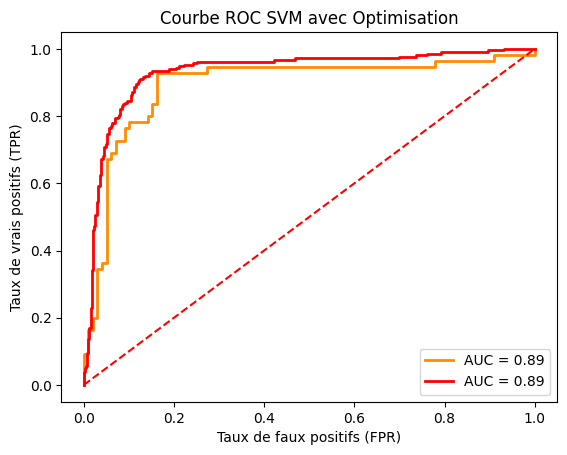

In [83]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC SVM avec Optimisation')
plt.show()

Evaluation de modele

In [84]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [85]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'SVM':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'SVM':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.84415584 0.84415584 0.84415584 0.88235294 0.84313725]
Précision moyenne de la validation croisée : 85.16%
Précision globale sur l'ensemble de test : 83.77%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        99
           1       0.76      0.80      0.78        55

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



In [86]:
print(conf_matrix)

[[85 14]
 [11 44]]


<Axes: >

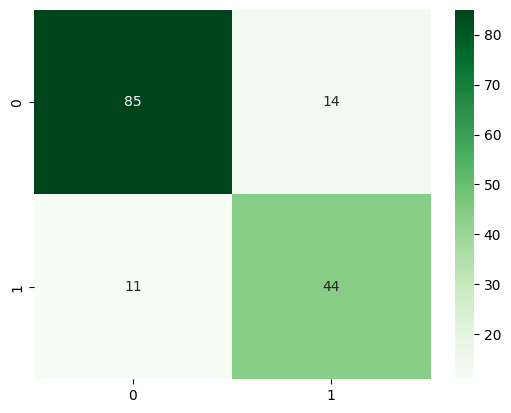

In [87]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Random forest sans optimisation

In [88]:
#Créer le modèle Randomforest
modelRDF = RandomForestClassifier(random_state=42)

In [89]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelRDF, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelRDF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Prédire sur l'ensemble de test
y_pred_test = modelRDF.predict(X_test)
y_pred_train = modelRDF.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelRDF.predict_proba(X_test)[:,1]
y_pred_proba_train = modelRDF.predict_proba(X_train)[:,1]

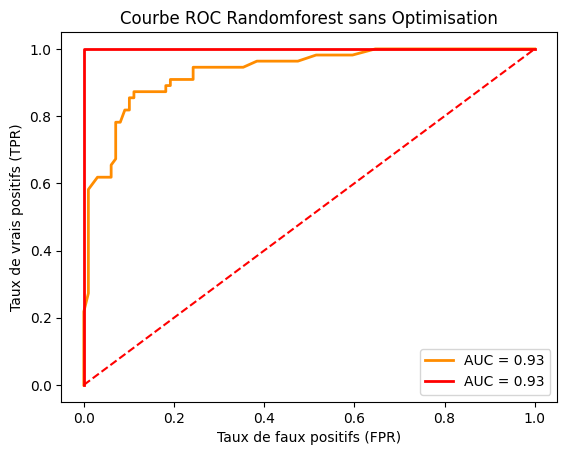

In [91]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Randomforest sans Optimisation')
plt.show()

In [92]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [93]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Randomforest':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Randomforest':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.87012987 0.85714286 0.87662338 0.89542484 0.88888889]
Précision moyenne de la validation croisée : 87.76%
Précision globale sur l'ensemble de test : 88.31%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154



In [94]:
print(conf_matrix)

[[88 11]
 [ 7 48]]


<Axes: >

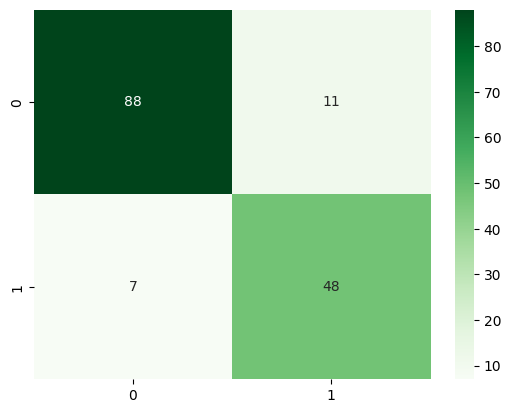

In [95]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Random forest avec optimisation

In [96]:
# Définir les hyperparamètres à tester pour Random Forest
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Créer le modèle Random Forest
modelRDF = RandomForestClassifier(random_state=42)
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchRDF = GridSearchCV(estimator=modelRDF, param_grid=param_grid, cv=5,
                           scoring='accuracy',verbose=2)

In [97]:
grid_searchRDF.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchRDF.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelRDF = grid_searchRDF.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

In [98]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelRDF, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelRDF.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [99]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelRDF.predict(X_test)
y_pred_train = best_modelRDF.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelRDF.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelRDF.predict_proba(X_train)[:,1]

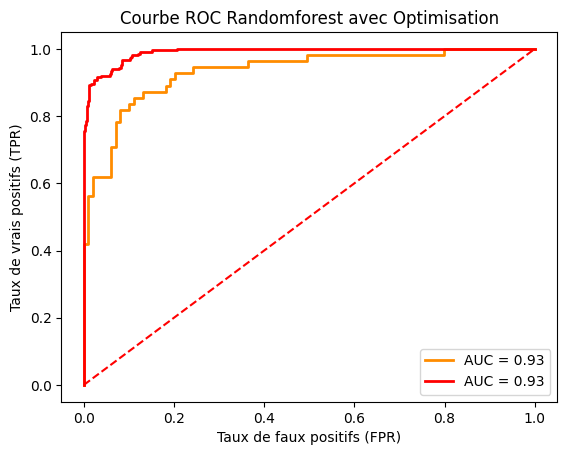

In [100]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Randomforest avec Optimisation')
plt.show()

In [101]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [102]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Randomforest':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Randomforest':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88311688 0.86363636 0.87012987 0.91503268 0.90196078]
Précision moyenne de la validation croisée : 88.68%
Précision globale sur l'ensemble de test : 87.01%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



In [103]:
print(conf_matrix)

[[87 12]
 [ 8 47]]


<Axes: >

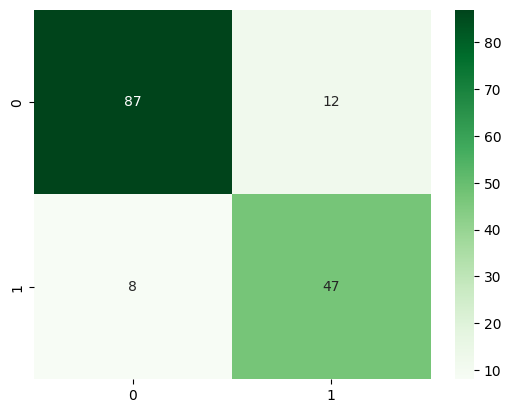

In [104]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
# Créer le modèle Naive Bayes Gaussien
modelNB = GaussianNB()

In [107]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelNB, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelNB.fit(X_train, y_train)

GaussianNB()

In [108]:
# Prédire sur l'ensemble de test
y_pred_test = modelNB.predict(X_test)
y_pred_train = modelNB.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelNB.predict_proba(X_test)[:,1]
y_pred_proba_train = modelNB.predict_proba(X_train)[:,1]

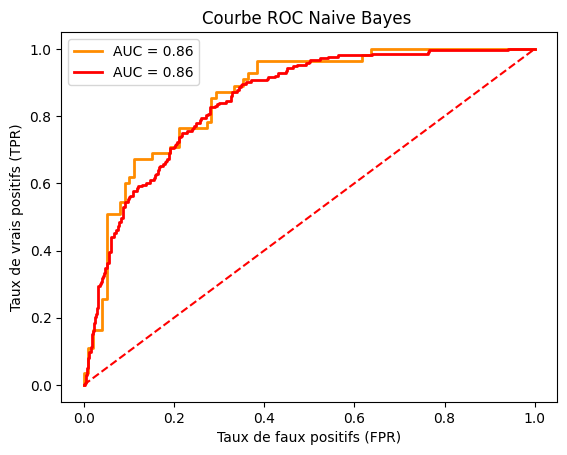

In [109]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Naive Bayes ')
plt.show()

In [110]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [111]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Naive Bayes':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Naive Bayes':round(accuracy,2)}
Accurancies1.update(T)
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.76623377 0.74025974 0.75324675 0.82352941 0.77124183]
Précision moyenne de la validation croisée : 77.09%
Précision globale sur l'ensemble de test : 76.62%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [112]:
print(conf_matrix)

[[80 19]
 [17 38]]


<Axes: >

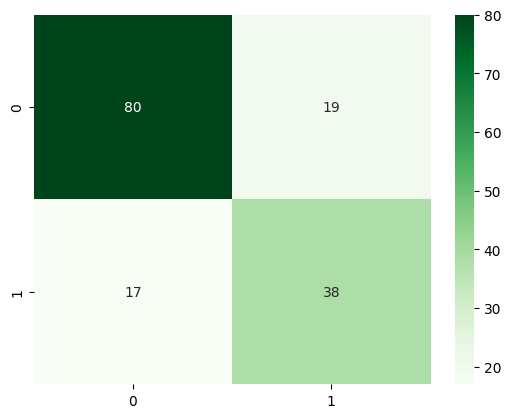

In [113]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Gradient Boosting Classifier sans optimisation

In [114]:
#Créer le modèle Gradient Boosting
modelGD1 = GradientBoostingClassifier()

In [115]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelGD1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelGD1.fit(X_train, y_train)

GradientBoostingClassifier()

In [116]:
# Prédire sur l'ensemble de test
y_pred_test = modelGD1.predict(X_test)
y_pred_train = modelGD1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelGD1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelGD1.predict_proba(X_train)[:,1]

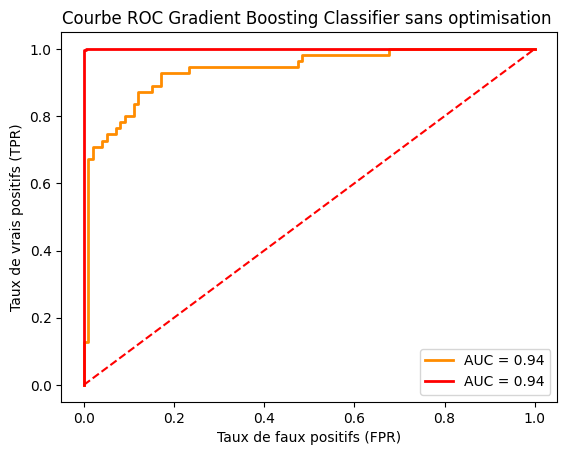

In [117]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Gradient Boosting Classifier sans optimisation ')
plt.show()

In [118]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [119]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Gradient Boosting Classifier':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Gradient Boosting Classifier':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88311688 0.85714286 0.8961039  0.88888889 0.90196078]
Précision moyenne de la validation croisée : 88.54%
Précision globale sur l'ensemble de test : 87.01%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.81      0.84      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



In [120]:
print(conf_matrix)

[[88 11]
 [ 9 46]]


<Axes: >

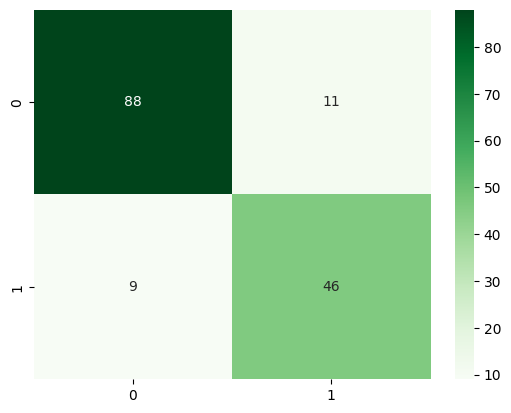

In [121]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Gradient Boosting Classifier avec optimisation

In [122]:
# Définir les hyperparamètres à tester pour Gradient Boosting
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.5, 1],
'max_depth': [3, 4, 5]
}
#Créer le modèle Gradient Boosting
modelGD = GradientBoostingClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchGD = GridSearchCV(estimator=modelGD, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [123]:
grid_searchGD.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchGD.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelGD = grid_searchGD.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [124]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelGD, scaled, Y, cv=cv, scoring='accuracy')
# Diviser les données
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelGD.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [125]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelGD.predict(X_test)
y_pred_train = best_modelGD.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelGD.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelGD.predict_proba(X_train)[:,1]

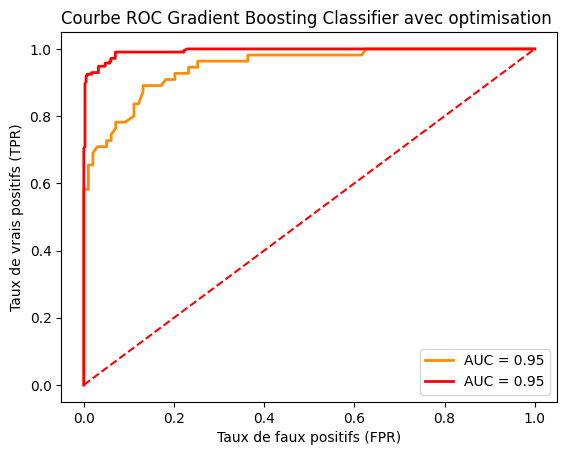

In [126]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Gradient Boosting Classifier avec optimisation ')
plt.show()

In [127]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [128]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Gradient Boosting Classifier':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Gradient Boosting Classifier':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88961039 0.88311688 0.88311688 0.92156863 0.91503268]
Précision moyenne de la validation croisée : 89.85%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [129]:
print(conf_matrix)

[[88 11]
 [11 44]]


<Axes: >

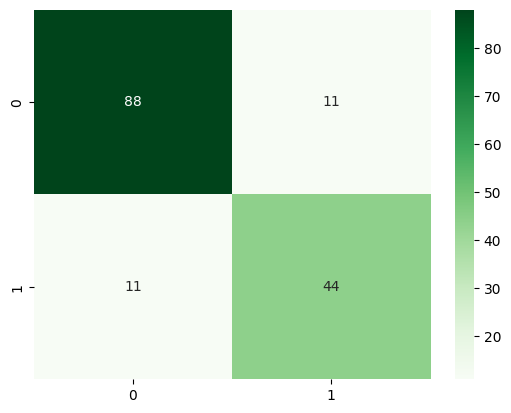

In [130]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### AdaBoost Classifier sans Optimisation

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Créer le modèle AdaBoost
modeladD1 = AdaBoostClassifier()

In [ ]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modeladD1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modeladD1.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Prédire sur l'ensemble de test
y_pred_test = modeladD1.predict(X_test)
y_pred_train = modeladD1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modeladD1.predict_proba(X_test)[:,1]
y_pred_proba_train = modeladD1.predict_proba(X_train)[:,1]

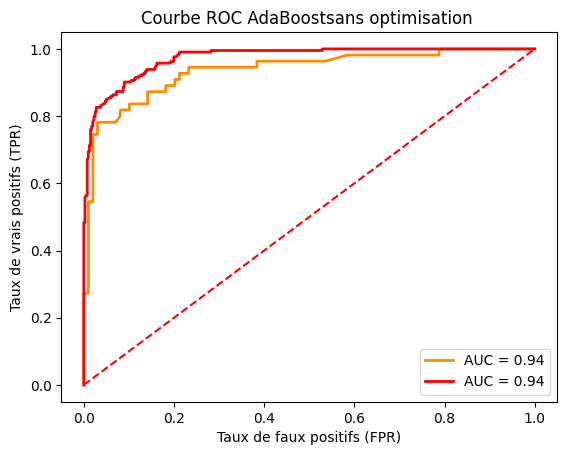

In [ ]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC AdaBoostsans optimisation ')
plt.show()

In [136]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [137]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'AdaBoost':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'AdaBoost':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.86363636 0.85714286 0.88961039 0.8627451  0.8496732 ]
Précision moyenne de la validation croisée : 86.46%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [138]:
print(conf_matrix)

[[86 13]
 [ 9 46]]


<Axes: >

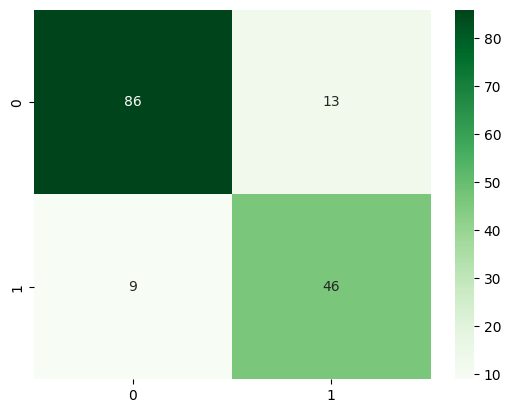

In [139]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### AdaBoost Classifier avec Optimisation

In [140]:
# Définir les hyperparamètres à tester pour Gradient Boosting
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 1, 10]
}
#Créer le modèle Gradient Boosting
modeladD = AdaBoostClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchadD = GridSearchCV(estimator=modeladD, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [141]:
grid_searchadD.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchadD.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modeladD = grid_searchadD.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.5s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.8s
[CV] END ...............learning_rate=0.01, n_es

In [142]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modeladD, scaled, Y, cv=cv, scoring='accuracy')
# Diviser les données
# Entraîner le modèle sur l'ensemble d'entraînement
best_modeladD.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [143]:
# Prédire sur l'ensemble de test
y_pred_test = best_modeladD.predict(X_test)
y_pred_train = best_modeladD.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modeladD.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modeladD.predict_proba(X_train)[:,1]

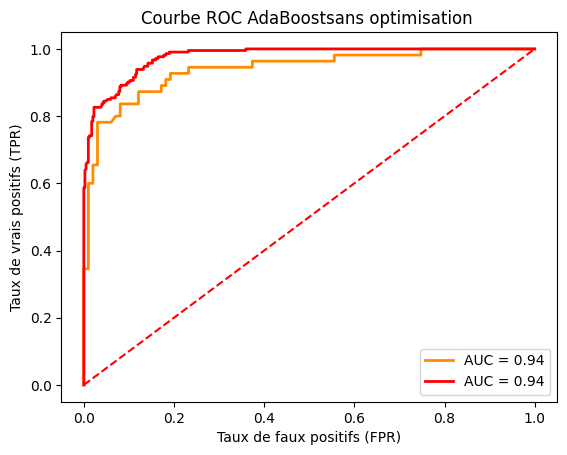

In [144]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC AdaBoostsans optimisation ')
plt.show()

In [145]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [146]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'AdaBoost':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'AdaBoost':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88311688 0.86363636 0.8961039  0.88888889 0.86928105]
Précision moyenne de la validation croisée : 88.02%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [147]:
print(conf_matrix)

[[87 12]
 [ 9 46]]


<Axes: >

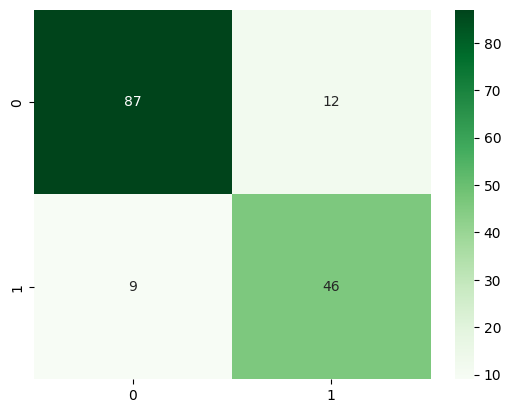

In [148]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Bagging (Bootstrap Aggregating) sans Optimisation

In [149]:
from sklearn.ensemble import BaggingClassifier

In [150]:
#Créer le modèle Bagging
modelBGG1 = BaggingClassifier()

In [151]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelBGG1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelBGG1.fit(X_train, y_train)

BaggingClassifier()

In [152]:
# Prédire sur l'ensemble de test
y_pred_test = modelBGG1.predict(X_test)
y_pred_train = modelBGG1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelBGG1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelBGG1.predict_proba(X_train)[:,1]

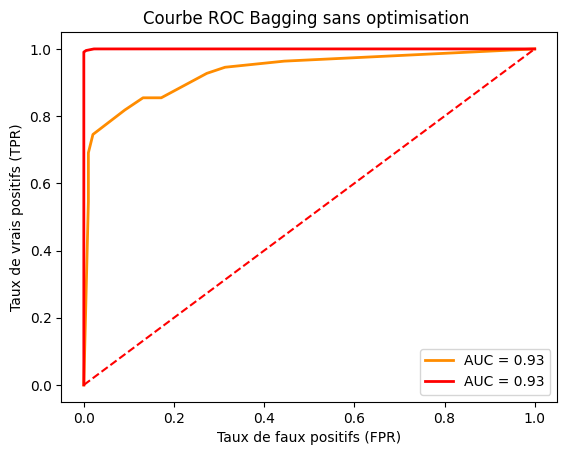

In [153]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Bagging sans optimisation ')
plt.show()

In [154]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [155]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Bagging':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Bagging':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.86363636 0.87012987 0.85064935 0.89542484 0.88888889]
Précision moyenne de la validation croisée : 87.37%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.85      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [156]:
print(conf_matrix)

[[86 13]
 [ 8 47]]


<Axes: >

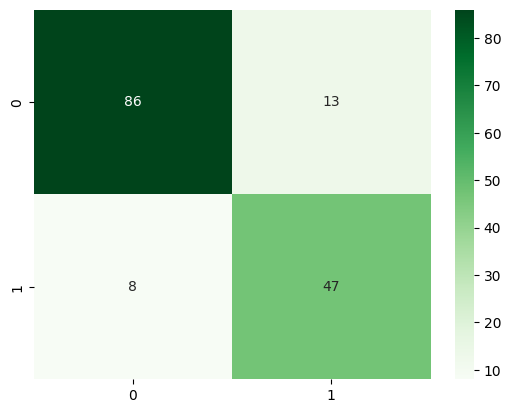

In [157]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Bagging (Bootstrap Aggregating) Avec Optimisation

In [158]:
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
'n_estimators': [10, 50, 100],
'max_samples': [0.5, 0.7, 1.0],
'max_features': [0.5, 0.7, 1.0],
'bootstrap': [True, False],
'bootstrap_features': [True, False]
}
#Créer le modèle Gradient Boosting
modelBGG = BaggingClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchBGG = GridSearchCV(estimator=modelBGG, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [159]:
grid_searchBGG.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchBGG.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelBGG = grid_searchBGG.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_est

In [160]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelBGG, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelBGG.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, n_estimators=50)

In [161]:
# Prédire sur l'ensemble de test
y_pred_test = modelBGG1.predict(X_test)
y_pred_train = modelBGG1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelBGG1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelBGG1.predict_proba(X_train)[:,1]

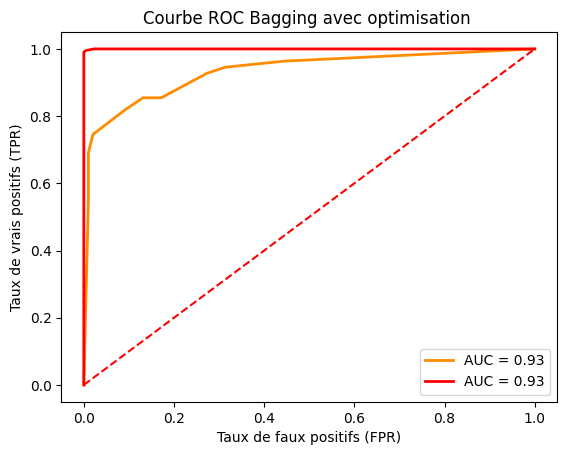

In [162]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Bagging avec optimisation ')
plt.show()

In [163]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [164]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'Bagging':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'Bagging':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.9025974  0.85064935 0.88311688 0.90196078 0.91503268]
Précision moyenne de la validation croisée : 89.07%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.78      0.85      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [165]:
print(conf_matrix)

[[86 13]
 [ 8 47]]


<Axes: >

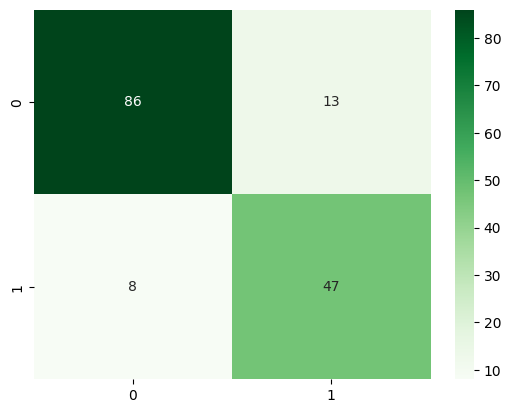

In [166]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### LGBMClassifier sans optimisation

In [3]:
import lightgbm as lgb

In [168]:
#Créer le modèle LGBMClassifier
modelLGM1 = lgb.LGBMClassifier()

In [169]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelLGM1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelLGM1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [170]:
# Prédire sur l'ensemble de test
y_pred_test = modelLGM1.predict(X_test)
y_pred_train = modelLGM1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelLGM1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelLGM1.predict_proba(X_train)[:,1]

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


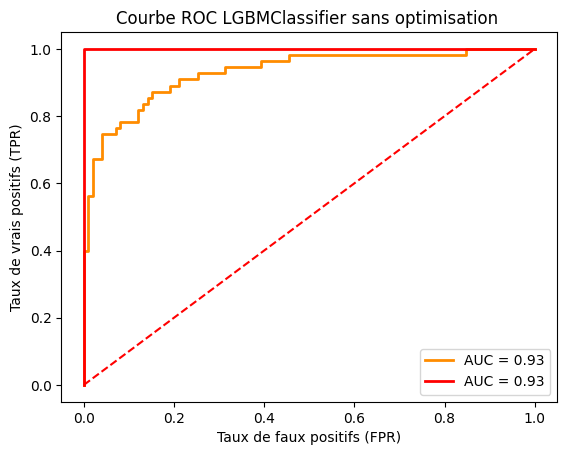

In [171]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC LGBMClassifier sans optimisation ')
plt.show()

In [172]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [173]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'LGBMClassifier':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'LGBMClassifier':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.87012987 0.85064935 0.87012987 0.92810458 0.91503268]
Précision moyenne de la validation croisée : 88.68%
Précision globale sur l'ensemble de test : 84.42%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        99
           1       0.78      0.78      0.78        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



In [174]:
print(conf_matrix)

[[87 12]
 [12 43]]


<Axes: >

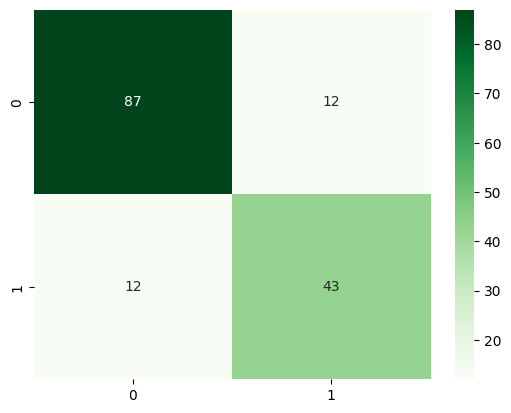

In [175]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### LGBMClassifier avec optimisation

In [176]:
 # Définition de la grille de paramètres pour GridSearchCV
param_grid = {
    'num_leaves':[31,50,100],
    'learning_rate':[0.01,0.1,0.5],
    'n_estimators':[20,40,100],
}
#Créer le modèle Gradient Boosting
modelLGM = lgb.LGBMClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchLGM = GridSearchCV(estimator=modelLGM, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [177]:
grid_searchLGM.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchLGM.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelLGM = grid_searchLGM.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END .learning_rate=0.01, n_estimators=40, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set:

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.01, n_estimators=100, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END learning_rate=0.01, n_estimators=100, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END ..learning_rate=0.1, n_estimators=40, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.1, n_estimators=100, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END learning_rate=0.1, n_estimators=100, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ..learning_rate=0.5, n_estimators=40, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ..learning_rate=0.5, n_estimators=40, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ..learning_rate=0.5, n_estimators=40, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=100, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [178]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelLGM, scaled, Y, cv=cv, scoring='accuracy')
# Diviser les données
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelLGM.fit(X_train, y_train)

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(n_estimators=20)

In [179]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelLGM.predict(X_test)
y_pred_train = best_modelLGM.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelLGM.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelLGM.predict_proba(X_train)[:,1]

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


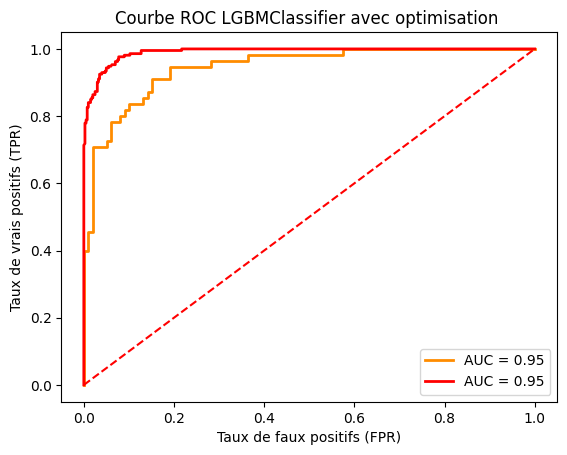

In [180]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC LGBMClassifier avec optimisation ')
plt.show()

In [181]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [182]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'LGBMClassifier':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'LGBMClassifier':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.88961039 0.85064935 0.9025974  0.92156863 0.91503268]
Précision moyenne de la validation croisée : 89.59%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [183]:
print(conf_matrix)

[[87 12]
 [ 9 46]]


<Axes: >

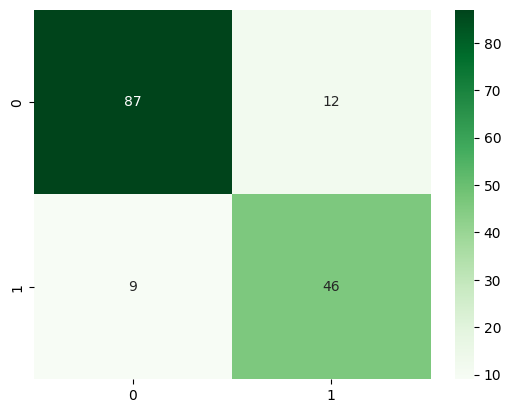

In [184]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### XGboost sans optimisation

In [4]:
from xgboost import XGBClassifier

In [186]:
#Créer le modèle XGboost
modelXGB1= XGBClassifier()

In [187]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelXGB1, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelXGB1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [188]:
# Prédire sur l'ensemble de test
y_pred_test = modelXGB1.predict(X_test)
y_pred_train = modelXGB1.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelXGB1.predict_proba(X_test)[:,1]
y_pred_proba_train = modelXGB1.predict_proba(X_train)[:,1]

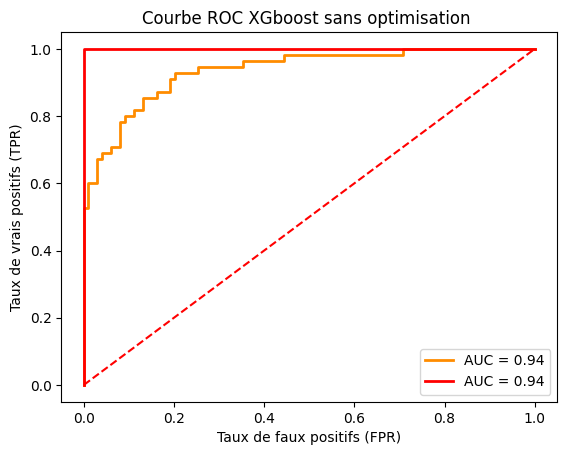

In [189]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC XGboost sans optimisation ')
plt.show()

In [190]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [191]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'XGboost':round(cv_scores.mean()*100,2)}
Accurancies_croos1.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'XGboost':round(accuracy,2)}
Accurancies1.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.87012987 0.87012987 0.86363636 0.92810458 0.91503268]
Précision moyenne de la validation croisée : 88.94%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [192]:
print(conf_matrix)

[[88 11]
 [11 44]]


<Axes: >

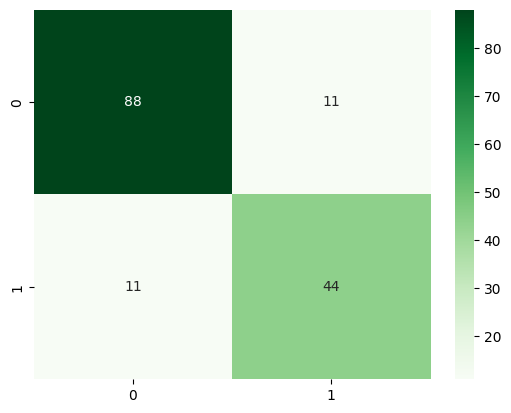

In [193]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### XGboost avec optimisation

In [194]:
#!pip install xgboost

In [195]:
from xgboost import XGBClassifier

In [196]:
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
    'max_depth':[3,4,5,7,8],
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[100,200,300,500,1000],
}
#Créer le modèle Gradient Boosting
modelXGB = XGBClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchXGB = GridSearchCV(estimator=modelXGB, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [197]:
grid_searchXGB.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchXGB.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelXGB = grid_searchXGB.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [198]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelXGB, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [199]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelXGB.predict(X_test)
y_pred_train = best_modelXGB.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelXGB.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelXGB.predict_proba(X_train)[:,1]

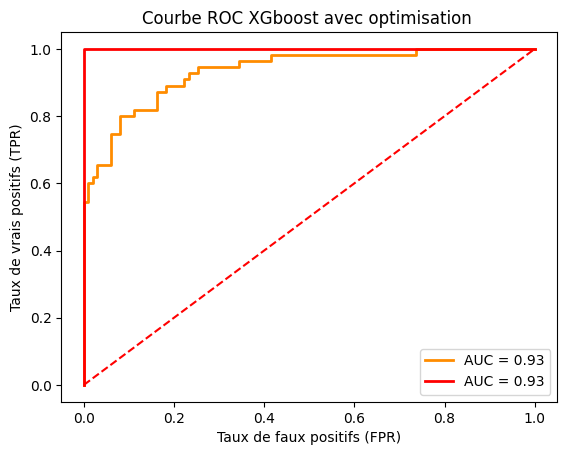

In [200]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_test,tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC XGboost avec optimisation ')
plt.show()

In [201]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [202]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
CVS={'XGboost':round(cv_scores.mean()*100,2)}
Accurancies_croos2.update(CVS)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
T={'XGboost':round(accuracy,2)}
Accurancies2.update(T)
print("Rapport de classification :")
print(report)

Scores de validation croisée : [0.87662338 0.88311688 0.87662338 0.93464052 0.92810458]
Précision moyenne de la validation croisée : 89.98%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.81      0.80      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [203]:
print(conf_matrix)

[[89 10]
 [11 44]]


<Axes: >

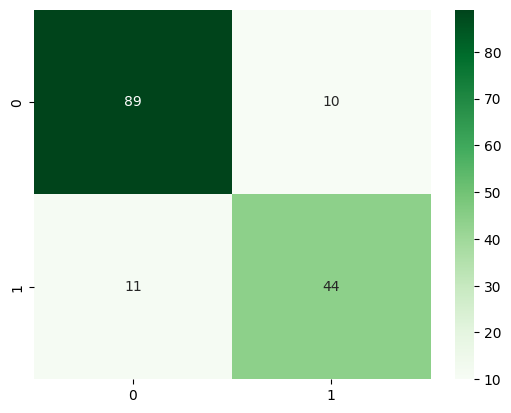

In [204]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Ameliorer les modeles

In [205]:
#https://www.kaggle.com/datasets/johndasilva/diabetes
df2=pd.read_csv('../AC_PFE/diabetesFRLEARN.csv')

In [206]:
X2=df2.drop('Outcome',axis=1)
Y2=df2['Outcome']

In [207]:
X2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [208]:
columns2 = X2.columns
for i in columns2:
    median_column(i)
    X2.loc[(df2['Outcome'] == 0 ) & (X2[i].isnull()), i] = median_column(i)[i][0]
    X2.loc[(df2['Outcome'] == 1 ) & (X2[i].isnull()), i] = median_column(i)[i][1]

In [209]:
scaler2=preprocessing.RobustScaler()
X2=scaler2.fit_transform(X2)
X_all = np.concatenate((scaled, X2), axis=0)# Puisque scaled et X2 sont des arrays (scaled)
y_all = pd.concat([Y, Y2], ignore_index=True)

In [210]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_all, y_all, test_size=0.2,
                                                    random_state=42)

In [213]:
best_modelKNN.fit(Xtrain, Ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [214]:
modelLR.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=200)

In [215]:
best_modelDT.fit(Xtrain, Ytrain)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [216]:
best_modelSVC.fit(Xtrain, Ytrain)

SVC(C=1, gamma=0.1, probability=True)

In [217]:
modelRDF.fit(Xtrain, Ytrain)

RandomForestClassifier(random_state=42)

In [218]:
modelNB.fit(Xtrain, Ytrain)

GaussianNB()

In [219]:
best_modeladD.fit(Xtrain, Ytrain)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [220]:
modelBGG1.fit(Xtrain, Ytrain)

BaggingClassifier()

In [221]:
best_modelLGM.fit(Xtrain, Ytrain)

[LightGBM] [Info] Number of positive: 765, number of negative: 1449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 2214, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345528 -> initscore=-0.638753
[LightGBM] [Info] Start training from score -0.638753


LGBMClassifier(n_estimators=20)

In [235]:
acuurancie_ameliorer={}

In [223]:
y_predKNN = best_modelKNN.predict(Xtest)
y_predLR = modelLR.predict(Xtest)
y_predDT = best_modelDT.predict(Xtest)
y_predSVC = best_modelSVC.predict(Xtest)
y_predRDF = modelRDF.predict(Xtest)
y_predNB = modelNB.predict(Xtest)
y_predGD=best_modelGD.predict(Xtest)
y_predadD = best_modeladD.predict(Xtest)
y_predBGG = modelBGG1.predict(Xtest)
y_predXGB = modelXGB1.predict(Xtest)
y_predLGM = best_modelLGM.predict(Xtest)

C:\Users\AdMin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [236]:
accurancyKNN=accuracy_score(y_predKNN, Ytest)
T1={'KNN':round(accurancyKNN,3)}
acuurancie_ameliorer.update(T1)

accurancyLR=accuracy_score(y_predLR, Ytest)
T2={'LogisticRegression':round(accurancyLR,3)}
acuurancie_ameliorer.update(T2)

accurancyDT=accuracy_score(y_predDT, Ytest)
T3={'DecisionTree':round(accurancyDT,3)}
acuurancie_ameliorer.update(T3)

accurancySVC=accuracy_score(y_predSVC,Ytest)
T4={'SVM':round(accurancySVC,3)}
acuurancie_ameliorer.update(T4)

accurancyRDF=accuracy_score(y_predRDF, Ytest)
T5={'Randomforest':round(accurancyRDF,3)}
acuurancie_ameliorer.update(T5)

accurancyNB=accuracy_score(y_predNB, Ytest)
T6={'Naive Bayes':round(accurancyNB,3)}
acuurancie_ameliorer.update(T6)

accurancyGD=accuracy_score(y_predGD, Ytest)
T7={'Gradient Boosting Classifier':round(accurancyGD,3)}
acuurancie_ameliorer.update(T7)

accurancyadD=accuracy_score(y_predadD, Ytest)
T8={'AdaBoost':round(accurancyadD,3)}
acuurancie_ameliorer.update(T8)

accurancyBGG=accuracy_score(y_predBGG, Ytest)
T9={'Bagging':round(accurancyBGG,3)}
acuurancie_ameliorer.update(T9)

accurancyLGM=accuracy_score(y_predLGM, Ytest)
T10={'LGBMClassifier':round(accurancyLGM,3)}
acuurancie_ameliorer.update(T10)

accurancyXGB=accuracy_score(y_predXGB, Ytest)
T11={'XGboost':round(accurancyXGB,3)}
acuurancie_ameliorer.update(T11)



In [211]:
Accurancies1

{'KNN': 0.86,
 'LogisticRegression': 0.77,
 'DecisionTree': 0.84,
 'SVM': 0.83,
 'Randomforest': 0.88,
 'Naive Bayes': 0.77,
 'Gradient Boosting Classifier': 0.87,
 'AdaBoost': 0.86,
 'Bagging': 0.86,
 'LGBMClassifier': 0.84,
 'XGboost': 0.86}

In [212]:
Accurancies2

{'KNN': 0.86,
 'LogisticRegression': 0.77,
 'DecisionTree': 0.86,
 'SVM': 0.84,
 'Randomforest': 0.87,
 'Naive Bayes': 0.77,
 'Gradient Boosting Classifier': 0.86,
 'AdaBoost': 0.86,
 'Bagging': 0.86,
 'LGBMClassifier': 0.86,
 'XGboost': 0.86}

In [237]:
acuurancie_ameliorer

{'KNN': 0.899,
 'LogisticRegression': 0.783,
 'DecisionTree': 0.958,
 'SVM': 0.904,
 'Randomforest': 0.989,
 'Naive Bayes': 0.783,
 'Gradient Boosting Classifier': 0.946,
 'AdaBoost': 0.895,
 'Bagging': 0.984,
 'LGBMClassifier': 0.96,
 'XGboost': 0.966}

In [238]:
data=[Accurancies1,Accurancies2,acuurancie_ameliorer]

In [239]:
check=pd.DataFrame(data)

In [240]:
check

,KNN,LogisticRegression,DecisionTree,SVM,Randomforest,Naive Bayes,Gradient Boosting Classifier,AdaBoost,Bagging,LGBMClassifier,XGboost
0,0.86,0.77,0.84,0.83,0.88,0.77,0.87,0.86,0.86,0.84,0.86
1,0.86,0.77,0.86,0.84,0.87,0.77,0.86,0.86,0.86,0.86,0.86
2,0.90,0.78,0.96,0.90,0.99,0.78,0.95,0.90,0.98,0.96,0.97


## Deep learning 

In [3]:
#https://www.mecs-press.org/ijieeb/ijieeb-v11-n2/IJIEEB-V11-N2-3.pdf /pour les layers

### ANN

In [5]:
import tensorflow as tf

#### Separation des donnes

In [ ]:
# 1. Séparer d'abord 70% pour l'entraînement et 30% pour validation+test
X_train, X_temp, Y_train, Y_temp = train_test_split(X_all, y_all, test_size=0.30, random_state=42)
# 2. Diviser ensuite X_temp en deux parties égales : 15% validation, 15% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)  # 50% de 30% = 15%
# Afficher les tailles pour vérifier
print(f"X_train shape: {X_train.shape}")  # 70%
print(f"X_val shape: {X_val.shape}")      # 15%
print(f"X_test shape: {X_test.shape}")    # 15%

#### Initialisation de l'ANN

In [ ]:
model = tf.keras.models.Sequential()

#### Ajout de la  première couche cachée

In [ ]:
model.add(tf.keras.layers.Dense(units=12, activation='relu')) #C'est la premier couche cachée

#### Ajout de la  deuxieme couche cachée

In [ ]:
#model.add(tf.keras.layers.Dense(units=16, activation='relu'))

#### Ajout de la  troisieme couche cachée

In [ ]:
#model.add(tf.keras.layers.Dense(units=16, activation='relu'))

#### Ajout de la  quatrieme couche cachée

In [ ]:
model.add(tf.keras.layers.Dense(units=14, activation='relu'))

#### Ajout de la couche de sortie

In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Compiler l'ANN

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

#### Entraîner l'ANN sur l'ensemble d'entraînement

In [ ]:
historique = model.fit(X_train.astype('float32'), Y_train, validation_data=(X_val.astype('float32'), Y_val), batch_size = 16, epochs = 40, verbose=1)

#### Réaliser les prédictions

In [ ]:
# Prédire les résultats de l'ensemble de tests
Y_pred_proba = model.predict(X_test.astype('float32'))
Y_pred = (Y_pred_proba > 0.5).astype(int)  # Convertit True/False en 1/0

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

In [ ]:
plt.plot(historique.history['loss'], label='Train Loss')
plt.plot(historique.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss binary_crossentropy')
plt.legend()
plt.title('Courbe de perte (Loss)')
plt.show()

In [ ]:
plt.plot(historique.history['accuracy'], label='Train accuracy')
plt.plot(historique.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Courbe de l'Accuracy")
plt.show()

In [ ]:
#Courbe ROC et AUC 
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC')
plt.show()

In [ ]:
# Courbe de précision-rappel (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, Y_pred_proba)
auc_pr = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Courbe Precision-Recall (AUC = {auc_pr:.2f})')
plt.show()

#### Evaluation

In [ ]:
CVS={'ANN': 0}
Accurancies_croos1.update(CVS)
T={'ANN':round(accuracy,2)}
Accurancies1.update(T)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)

In [ ]:
# Déterminer les différentes métriques d'évaluation du modèle
print('Precision du modèle : ',metrics.accuracy_score(y_test,Y_pred))
# Precision du modèle
print('Precision du modèle : ',metrics.precision_score(y_test, Y_pred)) 
# Recall du modèle
print('Recall du modèle : ',metrics.recall_score(y_test, Y_pred)) 
# F1-score du modèle
print('F1-score du modèle : ',metrics.f1_score(y_test, Y_pred))

In [ ]:
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### ANN Optimiser

In [ ]:
"""
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
RandomizedSearchCV est préférable pour des espaces de recherche larges, des hyperparamètres continus ou lorsque les ressources sont limitées. 
Il explore plus efficacement l’espace et peut souvent trouver des modèles aussi bons ou meilleurs que GridSearchCV, mais sans garantie d’exhaustivité
"""

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Construction du modèle
def build_model(activation='relu', optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model = Sequential([
        Dense(12, input_shape=(X.shape[1],), activation=activation),
        Dense(16, input_shape=(X.shape[1],), activation=activation),
        Dense(16, input_shape=(X.shape[1],), activation=activation),
        Dense(14, input_shape=(X.shape[1],), activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

clf = KerasClassifier(model=build_model, verbose=0)

# Grille (distribution)
param_dist = {
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd'],
    'model__learning_rate': np.logspace(-4, -2, 5),  # [0.0001, ..., 0.01]
    'batch_size': [16, 32, 64],
    'epochs': [20, 30, 50]
}

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=10,  # Nombre de combinaisons à tester
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=42
)

random_result = random_search.fit(X, y)
print("Best params:", random_result.best_params_)

In [ ]:
best_modelANN = random_result.best_estimator_

In [ ]:
best_modelANN.fit(X_train.astype('float32'), Y_train, validation_data=(X_val.astype('float32'), Y_val))

In [ ]:
# Prédire les résultats de l'ensemble de tests
Y_pred_proba = model.predict(X_test.astype('float32'))
Y_pred = (Y_pred_proba > 0.5).astype(int)  # Convertit True/False en 1/0

In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred)
conf_matrix = confusion_matrix(y_test, Y_pred)

In [ ]:
plt.plot(historique.history['loss'], label='Train Loss')
plt.plot(historique.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss binary_crossentropy')
plt.legend()
plt.title('Courbe de perte (Loss)')
plt.show()

In [ ]:
plt.plot(historique.history['accuracy'], label='Train accuracy')
plt.plot(historique.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Courbe de l'Accuracy")
plt.show()

In [ ]:
#Courbe ROC et AUC 
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC')
plt.show()

In [ ]:
# Courbe de précision-rappel (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, Y_pred_proba)
auc_pr = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Courbe Precision-Recall (AUC = {auc_pr:.2f})')
plt.show()

In [ ]:
CVS={'ANN': 0}
Accurancies_croos2.update(CVS)
T={'ANN':round(accuracy,2)}
Accurancies2.update(T)
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)

In [ ]:
# Déterminer les différentes métriques d'évaluation du modèle
print('Precision du modèle : ',metrics.accuracy_score(y_test,Y_pred))
# Precision du modèle
print('Precision du modèle : ',metrics.precision_score(y_test, Y_pred)) 
# Recall du modèle
print('Recall du modèle : ',metrics.recall_score(y_test, Y_pred)) 
# F1-score du modèle
print('F1-score du modèle : ',metrics.f1_score(y_test, Y_pred))

In [ ]:
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

## Enregitrement des models et scaler

In [6]:
import pickle

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
with open("modelknn.pkl", "wb") as f:
    pickle.dump(best_modelKNN, f)

In [ ]:
with open("modelLR.pkl", "wb") as f:
    pickle.dump(modelLR, f)

In [ ]:
with open("model_DecisionTree.pkl", "wb") as f:
    pickle.dump(best_modelDT, f)

In [ ]:
with open("modelSVC.pkl", "wb") as f:
    pickle.dump(best_modelSVC, f)

In [ ]:
with open("model_RandomForest.pkl", "wb") as f:
    pickle.dump(modelRDF, f)

In [ ]:
with open("model_Naivebayes.pkl", "wb") as f:
    pickle.dump(modelNB, f)

In [ ]:
with open("model_Gradient.pkl", "wb") as f:
    pickle.dump(best_modelGD, f)

In [ ]:
with open("model_adaboost.pkl", "wb") as f:
    pickle.dump(best_modeladD, f)

In [ ]:
with open("modelBagging.pkl", "wb") as f:
    pickle.dump(modelBGG1, f)

In [ ]:
with open("modelXGB.pkl", "wb") as f:
    pickle.dump(modelXGB1, f)

In [ ]:
with open("modelLGM.pkl", "wb") as f:
    pickle.dump(best_modelLGM, f)